# Creating a pivot table

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
os.chdir("E:\\Prasad\\Deloitte\\Loan_Data")

In [3]:
data = pd.read_csv("loan.csv",low_memory = False)
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
data.shape

(39717, 111)

In [5]:
list(data.columns)

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_

In [7]:
data.emp_title.isnull().sum()

2459

In [9]:
data.drop(["id","member_id","url",'desc','zip_code','title','emp_title'],axis =1, inplace  =True)

# pivot table

# how to group data using index in pivot table

In [10]:
table = pd.pivot_table(data=data,index= ["grade"])
table

,acc_now_delinq,annual_inc,chargeoff_within_12_mths,collection_recovery_fee,collections_12_mths_ex_med,delinq_2yrs,delinq_amnt,dti,funded_amnt,funded_amnt_inv,...,pub_rec_bankruptcies,recoveries,revol_bal,tax_liens,total_acc,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp
grade,,,,,,,,,,,,,,,,,,,,,
A,0,66648.847979,0.0,3.023844,0.0,0.044621,0,12.052141,8402.421914,8155.229508,...,0.012873,20.387912,11380.674170,0.0,23.460486,9008.823515,8740.354899,842.937910,0.543738,8144.953967
B,0,67639.958014,0.0,6.692019,0.0,0.115225,0,13.430587,10861.335275,10327.162203,...,0.044789,58.684082,13420.012396,0.0,21.905657,11961.068098,11392.483319,1857.422361,1.002424,10043.959324
C,0,67939.195952,0.0,15.563399,0.0,0.186219,0,13.890301,10779.263398,10051.275649,...,0.058876,103.395343,13598.507039,0.0,21.107557,12018.054169,11241.514192,2366.342801,1.738885,9546.577267
D,0,68524.874605,0.0,18.677531,0.0,0.246279,0,13.957618,12069.789900,11381.815858,...,0.057544,140.719382,14036.259469,0.0,20.884304,13584.562903,12893.022344,3140.296557,1.963486,10301.583657
E,0,77989.406921,0.0,28.453310,0.0,0.241379,0,14.094947,15254.327938,14461.885999,...,0.062700,236.459178,16212.012315,0.0,22.237509,17583.912931,16693.156752,4926.436956,2.576016,12418.440781
F,0,84602.272059,0.0,55.865587,0.0,0.337464,0,14.121544,17688.417541,16891.627492,...,0.069632,459.489675,17428.804576,0.0,23.710200,20415.496968,19506.622507,6549.730734,3.180148,13403.096416
G,0,94386.473133,0.0,54.362746,0.0,0.408228,0,14.010854,19828.639241,18857.510145,...,0.057325,420.277152,20451.664557,0.0,23.936709,23017.580311,22047.097658,7528.055095,4.567769,15064.680222


# how to run pivot table with multiple index

In [11]:
table  = pd.pivot_table(data,index= ["grade","home_ownership"])
table

acc_now_delinq     annual_inc  chargeoff_within_12_mths  \
grade home_ownership                                                            
A     MORTGAGE                     0   77692.452264                       0.0   
      NONE                         0   22200.000000                       0.0   
      OTHER                        0   69464.833333                       0.0   
      OWN                          0   55581.797832                       0.0   
      RENT                         0   54875.614419                       0.0   
B     MORTGAGE                     0   81903.596655                       0.0   
      NONE                         0  110000.000000                       NaN   
      OTHER                        0   65711.343750                       0.0   
      OWN                          0   60730.895914                       0.0   
      RENT                         0   55925.511921                       0.0   
C     MORTGAGE                     0   85053.724849                       0.0   
      OTHER                        0   57126.062500                       0.0   
      OWN                          0   55304.892680                       0.0   
      RENT                         0   56444.751559                       0.0   
D     MORTGAGE                     0   83451.874524                       0.0   
      OTHER                        0  103148.235294                       0.0   
      OWN                          0   59921.911481                       0.0   
      RENT                         0   58676.944414                       0.0   
E     MORTGAGE                     0   95157.170380                       0.0   
      OTHER                        0   52699.428571                       0.0   
      OWN                          0   66104.369137                       0.0   
      RENT                         0   64051.586589                       0.0   
F     MORTGAGE                     0   98667.590372                       0.0   
      OTHER                        0   91000.000000                       0.0   
      OWN                          0   77500.726515                       0.0   
      RENT                         0   70279.993106                       0.0   
G     MORTGAGE                     0  110340.881830                       0.0   
      OWN                          0   66512.000000                       0.0   
      RENT                         0   81529.961357                       0.0   

                      collection_recovery_fee  collections_12_mths_ex_med  \
grade home_ownership                                                        
A     MORTGAGE                       1.709279                         0.0   
      NONE                           0.000000                         0.0   
      OTHER                          0.000000                         0.0   
      OWN                            8.505389                         0.0   
      RENT                           3.547466                         0.0   
B     MORTGAGE                       7.837881                         0.0   
      NONE                           0.000000                         NaN   
      OTHER                         56.503006                         0.0   
      OWN                           12.305673                         0.0   
      RENT                           4.494833                         0.0   
C     MORTGAGE                      18.455022                         0.0   
      OTHER                          0.268750                         0.0   
      OWN                            8.352635                         0.0   
      RENT                          14.392700                         0.0   
D     MORTGAGE                      22.042369                         0.0   
      OTHER                          0.699671                         0.0   
      OWN                           19.763226                         0.0   
      RENT                          16.210373  

# diffenrent aggregation functions for different features

In [21]:
table = pd.pivot_table(data,index=["grade","home_ownership"],aggfunc={'loan_amnt':np.mean,'loan_status':np.sum})
table

loan_amnt  \
grade home_ownership                 
A     MORTGAGE         9171.111757   
      NONE            10000.000000   
      OTHER            7019.791667   
      OWN              8032.641292   
      RENT             8061.830025   
B     MORTGAGE        12743.573203   
      NONE             3400.000000   
      OTHER           11514.062500   
      OWN             10844.327957   
      RENT             9704.069368   
C     MORTGAGE        13069.446140   
      OTHER           10875.000000   
      OWN              9631.574539   
      RENT             9592.015209   
D     MORTGAGE        14382.851942   
      OTHER           11467.647059   
      OWN             11233.994709   
      RENT            10901.235975   
E     MORTGAGE        18604.631829   
      OTHER           12728.571429   
      OWN             14522.081218   
      RENT            13520.218182   
F     MORTGAGE        21141.242661   
      OTHER           25000.000000   
      OWN             15130.303030   
      RENT            15768.776596   
G     MORTGAGE        21641.176471   
      OWN             19985.869565   
      RENT            18720.714286   

                                                            loan_status  
grade home_ownership                                                     
A     MORTGAGE        Fully PaidFully PaidFully PaidFully PaidCharge...  
      NONE                                                   Fully Paid  
      OTHER           Charged OffFully PaidFully PaidFully PaidFully...  
      OWN             Fully PaidFully PaidFully PaidCharged OffFully...  
      RENT            Fully PaidFully PaidFully PaidFully PaidFully ...  
B     MORTGAGE        Fully PaidFully PaidFully PaidCharged OffFully...  
      NONE                                         Fully PaidFully Paid  
      OTHER           Fully PaidFully PaidFully PaidCharged OffFully...  
      OWN             Fully PaidFully PaidFully PaidFully PaidFully ...  
      RENT            Fully PaidCurrentCharged OffFully PaidCharged ...  
C     MORTGAGE        Fully PaidCharged OffCharged OffCharged OffFul...  
      OTHER           Fully PaidFully PaidFully PaidFully PaidFully ...  
      OWN             Fully PaidFully PaidFully PaidCharged OffFully...  
      RENT            Charged OffFully PaidFully PaidFully PaidCharg...  
D     MORTGAGE        Fully PaidFully PaidFully PaidFully PaidCharge...  
      OTHER           Charged OffCharged OffFully PaidFully PaidChar...  
      OWN             Fully PaidCharged OffFully PaidFully PaidCurre...  
      RENT            Fully PaidCharged OffFully PaidFully PaidFully...  
E     MORTGAGE        Fully PaidFully PaidFully PaidFully PaidFully ...  
      OTHER           Fully PaidCharged OffFully PaidFully PaidCharg...  
      OWN             Charged OffCharged OffFully PaidFully PaidChar...  
      RENT            Fully PaidCharged OffFully PaidFully PaidCharg...  
F     MORTGAGE        Fully PaidFully PaidFully PaidCharged OffCharg...  
      OTHER                                       Charged OffFully Paid  
      OWN             Charged OffFully PaidFully PaidCurrentCharged ...  
      RENT            Charged OffFully PaidCurrentCharged OffFully P...  
G     MORTGAGE        Fully PaidFully PaidCharged OffFully PaidCharg...  
      OWN             CurrentCharged OffCurrentFully PaidCharged Off...  
      RENT            CurrentCharged OffCharged OffFully PaidFully P...

<AxesSubplot:xlabel='grade,home_ownership'>

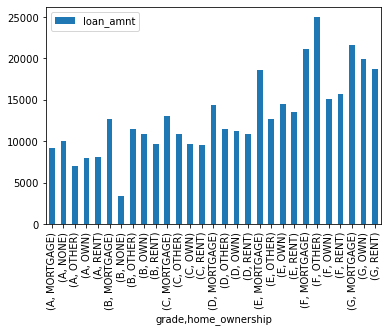

In [22]:
table.plot(kind = "bar")

# contingency table or cross tabulation

In [23]:
cros_tab = pd.crosstab(data["grade"],data["home_ownership"],margins = False)
cros_tab

home_ownership,MORTGAGE,NONE,OTHER,OWN,RENT
grade,,,,,
A,5163,1,24,867,4030
B,5232,2,32,930,5824
C,3277,0,16,597,4208
D,2060,0,17,378,2852
E,1263,0,7,197,1375
F,511,0,2,66,470
G,153,0,0,23,140
